In [ ]:
import YData
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statistics
import seaborn as sns
import plotly.express as px
from urllib.request import urlopen


# Loops

In [ ]:
fruits = ["apple", "banana", "cherry", "date"]

# A loop for displaying these items...


In [ ]:
print(f"The value of _fruit_ is \t{fruits[0]}\t. It's type is {type(fruits[0])}\t, and it's length is {len(fruits[0])}\t. The value of the list _fruits_ is \t{fruits}\t.")
print(f"The value of _fruit_ is \t{fruits[1]}\t. It's type is {type(fruits[1])}\t, and it's length is {len(fruits[1])}\t. The value of the list _fruits_ is \t{fruits}\t.")
print(f"The value of _fruit_ is \t{fruits[2]}\t. It's type is {type(fruits[2])}\t, and it's length is {len(fruits[2])}\t. The value of the list _fruits_ is \t{fruits}\t.")
print(f"The value of _fruit_ is \t{fruits[3]}\t. It's type is {type(fruits[3])}\t, and it's length is {len(fruits[3])}\t. The value of the list _fruits_ is \t{fruits}\t.")

In [ ]:
# Do the same using a for loop...

### Using zip and enumerate in loops.

Credit: chatGPT!

In [ ]:
# example without zip enumerate

# Two lists to iterate over
names = ["Alice", "Bob", "Charlie"]
scores = [85, 90, 95]

# Manual indexing
for i in range(len(names)):
    print(f"Index: {i}, \tName: {names[i]}, \tScore: {scores[i]}")



In [ ]:
# Using zip and enumerate
...

In [ ]:
# Zip alone
...

### Using zip in creating a dataframe

In [ ]:
# Data for the DataFrame
names = ["Alice", "Bob", "Charlie"]
scores = [85, 90, 95]
grades = ["A", "A-", "B+"]

# Use zip to combine the lists into rows
data = list(zip(names, scores, grades))

# Create a DataFrame
df = pd.DataFrame(data, columns=["Name", "Score", "Grade"])

# Display the DataFrame
print(df)

In [ ]:
# You can also create a DataFrame without using zip:
# Create a dictionary manually
data = {
    "Name": names,
    "Score": scores,
    "Grade": grades
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Hypothesis test (for synthetic data)

We will create a synthetic dataset of the number of view that tiktok videos views @nala_cat gets vs. those that I would have gotten.

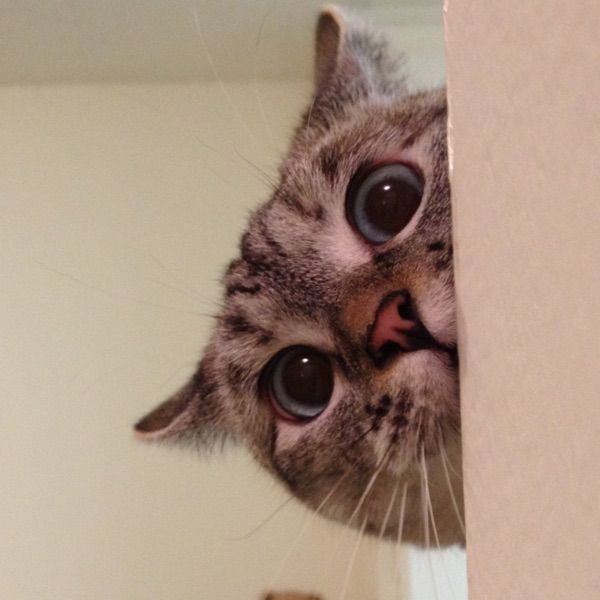

Credit: @nala_cat

In [ ]:
np.random.seed(123)
n = ...
nviews_nala = ...
nviews_roy  = ...

df1 = pd.DataFrame({'nviews': nviews_nala, 'account': ["nala"] * n})
df2 = pd.DataFrame({'nviews': nviews_roy, 'account': ["roy"] * n})
df = pd.concat([df1, df2], ignore_index=True)

### Step 1: State the null and alternative hypotheses


$H_0$: $\mu_{nala} =  \mu_{roy}$   or    $H_0$: $\mu_{nala} -  \mu_{roy} = 0$ 

$H_A$: $\mu_{nala} >  \mu_{roy}$   or    $H_0$: $\mu_{nala} -  \mu_{roy} > 0$ 


Where $\mu_{nala}$ and $\mu_{roy}$ are the population means of the number of views of videos by Nala and by Roy.

### Step 2: Calculate the observed statistic


Let's have our observed statistic be the different of sample means  $\bar{x}_{nala} - \bar{x}_{roy}$.  

Please calculate this observe statistic and save it to the name `obs_stat`.


In [ ]:
results_table = ...
results_table

In [ ]:

obs_stat_series = ...
obs_stat = obs_stat_series.iloc[0]
obs_stat

To make the rest of the analysis easier, write a function `get_diff_views(views_df)` that will take a DataFrame `views_df` that has account and views information and will return the difference in the means of views. 

Also, test the function to make sure it give the same observed statistic you calculated above

In [ ]:
def get_diff_views(views_df):
    ...

# check that the function works
get_diff_views(df)


### Step 3: Create the null distribution 

Now let's create a null distribution that has 10,000 statistics that are consistent with the null hypothesis. 

In this example, if the null hypothesis was true, then there would be no difference between the smoking mothers and the non-smoking mothers. Thus, under the null hypothesis, we can shuffle the group labels and get equally valid statistics. 

Let's create one statistic consistent with the null distribution to understand the process. We can then repeat this 10,000 times to get a full null distribution. 

In [ ]:
# shuffle the data 

shuff_df = df.copy()
...

get_diff_views(shuff_df)


In [ ]:
%%time

# create a full null distribution 

null_dist = []
shuff_df = df.copy()
for i in range(10000):  
    ...


In [ ]:
# visualize the null distribution 

plt.hist(null_dist, edgecolor = "black", bins = 100);


# put a line at the observed statistic value

plt.axvline(obs_stat, color = "red");
plt.xlabel("prop treat - prop control");
plt.ylabel("Count");

### Step 4: Calculate the p-value

The p-value is the proportion of points in the null distribution that are more extreme than the observed statistic. 


In [ ]:
p_value = np.mean(np.array(null_dist) >= obs_stat)
p_value

### Step 5: Draw a conclusion

???

### Variation 1

$H_0$: $\mu_{nala} =  \mu_{roy}$   or    $H_0$: $\mu_{nala} -  \mu_{roy} = 0$ 

 $H_A$: $\cancel{\mu_{nala} >  \mu_{roy}}$   

$H_A$: $\mu_{nala} <  \mu_{roy}$   or    $H_0$: $\mu_{roy} -  \mu_{nala} > 0$ 

In [ ]:
def get_diff_views(views_df):   
    results_table = views_df.groupby("account").mean()
    obs_stat_series = ...
    return obs_stat_series.iloc[0]
obs_stat = get_diff_views(df)
print(obs_stat)

In [ ]:
null_dist = []
shuff_df = df.copy()
for i in range(10000):  
    shuff_df['account'] = np.random.permutation(shuff_df["account"])
    shuff_stat = get_diff_views(shuff_df)
    null_dist.append(shuff_stat)

plt.hist(null_dist, edgecolor = "black", bins = 100);
# put a line at the observed statistic value
plt.axvline(obs_stat, color = "red");
plt.xlabel("prop treat - prop control");
plt.ylabel("Count");

In [ ]:
p_value = np.mean(np.array(null_dist) >= obs_stat)
p_value

### Variation 2

$H_0$: $\mu_{nala} =  \mu_{roy}$   or    $H_0$: $\mu_{nala} -  \mu_{roy} = 0$ 

$H_A$: $\cancel{\mu_{nala} >  \mu_{roy}}$   

$H_A$: $\cancel{\mu_{roy} >  \mu_{nala}}$   


$H_A$: $\mu_{nala} \neq  \mu_{roy}$   or    $H_0$: $ (\mu_{roy} -  \mu_{nala} > 0 ) ~OR~ (\mu_{nala} -  \mu_{roy} > 0 )$ 

In [ ]:
def get_diff_views(views_df):   
    results_table = views_df.groupby("account").mean()
    obs_stat_series = (results_table.loc["roy"] - results_table.loc["nala"])
    return obs_stat_series.iloc[0]
obs_stat = ...
print(obs_stat)

In [ ]:
null_dist = []
shuff_df = df.copy()
for i in range(10000):  
    shuff_df['account'] = np.random.permutation(shuff_df["account"])
    shuff_stat = get_diff_views(shuff_df)
    null_dist.append(shuff_stat)

plt.hist(null_dist, edgecolor = "black", bins = 100);
# put a line at the observed statistic value
plt.axvline(obs_stat, color = "red");
plt.axvline(-obs_stat, color = "red"); ## Note additional line
plt.xlabel("prop treat - prop control");
plt.ylabel("Count");

In [ ]:
p_value_right = ...
p_value_left = ...

p_value = ...

p_value

### Variation 3

$H_0$: $\mu_{nala} =  \mu_{roy}$   or    $H_0$: $\mu_{nala} -  \mu_{roy} = 0$ 

$H_A$: $\cancel{\mu_{nala} >  \mu_{roy}}$   

$H_A$: $\cancel{\mu_{roy} >  \mu_{nala}}$   


$H_A$: $\mu_{nala} \neq  \mu_{roy}$   or    $H_0$: $| \mu_{roy} -  \mu_{nala} |> 0$ 

In [ ]:
def get_diff_views(views_df):   
    results_table = views_df.groupby("account").mean()
    obs_stat_series = abs(results_table.loc["roy"] - results_table.loc["nala"])
    return obs_stat_series.iloc[0]
obs_stat = get_diff_views(df)
print(obs_stat)

In [ ]:
null_dist = []
shuff_df = df.copy()
for i in range(10000):  
    shuff_df['account'] = np.random.permutation(shuff_df["account"])
    shuff_stat = get_diff_views(shuff_df)
    null_dist.append(shuff_stat)

plt.hist(null_dist, edgecolor = "black", bins = 100);
# put a line at the observed statistic value
plt.axvline(obs_stat, color = "red");
plt.xlabel("prop treat - prop control");
plt.ylabel("Count");

In [ ]:
p_value = np.mean(np.array(null_dist) >= obs_stat)

p_value

### Variation 4

Smaller differences and sample sizes.

$H_0$: $\mu_{nala} =  \mu_{roy}$   or    $H_0$: $\mu_{nala} -  \mu_{roy} = 0$ 

$H_A$: $\mu_{nala} \neq  \mu_{roy}$   or    $H_0$: $| \mu_{roy} -  \mu_{nala} |> 0$ 

In [ ]:
np.random.seed(123)
n = ...
nviews_nala = np.round( (...) * np.random.rand(n) )
nviews_roy  = np.round( (...) * np.random.rand(n) )

df1 = pd.DataFrame({'nviews': nviews_nala, 'account': ["nala"] * n})
df2 = pd.DataFrame({'nviews': nviews_roy, 'account': ["roy"] * n})
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
def get_diff_views(views_df):   
    results_table = views_df.groupby("account").mean()
    obs_stat_series = abs(results_table.loc["roy"] - results_table.loc["nala"])
    return obs_stat_series.iloc[0]
obs_stat = get_diff_views(df)
print(obs_stat)

In [ ]:
null_dist = []
shuff_df = df.copy()
for i in range(10000):  
    shuff_df['account'] = np.random.permutation(shuff_df["account"])
    shuff_stat = get_diff_views(shuff_df)
    null_dist.append(shuff_stat)

plt.hist(null_dist, edgecolor = "black", bins = 100);
# put a line at the observed statistic value
plt.axvline(obs_stat, color = "red");
plt.xlabel("prop treat - prop control");
plt.ylabel("Count");

In [ ]:
p_value = np.mean(np.array(null_dist) >= obs_stat)

p_value

# Machine Learning

Identical to the code from class 22, applied to a different dataset!


In [ ]:
iris = sns.load_dataset("iris")
iris = iris.dropna()
iris = iris.sample(frac = 1)
iris.head()

In [ ]:
# get the features and the labels
X_iris_features = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y_iris_labels = iris['species']


### Training on the entire dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# construct a classifier
knn = ...
# “train” the classifier (which for a KNN classifier just involves memorizing the training data)
...

### Simple Cross-validation

One would often train a classifier on a training set and validate it on a test set. In fact, in some cases there would be a *training set*, *validation set* which is used to fine-tune parameters, and a *test set* used to validate the result. 

Creating training and test subsets using the `train_test_split()` function.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris_features,  
                                                    y_iris_labels, 
                                                    random_state = 1)
print(X_train.shape)
print(X_test.shape)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# construct a classifier
knn = KNeighborsClassifier(n_neighbors = 1) 
# “train” the classifier (which for a KNN classifier just involves memorizing the training data)
knn.fit(..., ...) 

In [ ]:
# get the predictions
iris_preditions = knn.predict(...)

In [ ]:
# Get the prediction accuracy 
np.mean(iris_preditions == ...)

In [ ]:
# Test the classifier on the test set using the .score() method
knn.score(X_test, y_test) # prediction accuracy on the test set

In [ ]:
# What happens if we test the classifier on the training set? 
knn.score(X_train, y_train) # prediction accuracy on the training set

### K-fold cross-validation

Helps us get slightly better statistics for the quality of our predictor.


In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors = 1) # construct knn classifier

# do 5-fold cross-validation
scores = cross_val_score(knn, X_iris_features,  y_iris_labels, cv = 5)

print(scores)

print(scores.mean())

### Feature normalization


First, let's consider how the normalization works explicitly.


In [ ]:
from sklearn.preprocessing import StandardScaler
# learning the mean and standard deviations to scale the features
scalar = StandardScaler()
scalar.fit(X_train)


In [ ]:
# z-score transform the features 
X_train_transformed = scalar.transform(X_train)
X_test_transformed = scalar.transform(X_test)
# note that the transform changes the type:
print(type(X_train), type(X_test_transformed))

Let's see how our classification accuracy changes using the z-score transformed data

In [ ]:
# apply KNN classification on the normalized features

knn = KNeighborsClassifier(n_neighbors = 1) 
knn.fit(X_train_transformed, y_train)
knn.score(X_test_transformed, y_test)

### Pipeline

We can pack the transform and classifier into a pipeline that does BOTH.

It is much shorter to write our normalization + classifier as a pipeline. ***Once we write he pipeline we can use it the same way we would have used a classifier,*** using the `fit` function. 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
# create a pipeline for running cross-validation with feature normalization

# components that go into the pipeline
scalar = StandardScaler()
knn = KNeighborsClassifier(n_neighbors = 1) 
cv = KFold(n_splits=5)

# build the pipeline
pipeline = Pipeline([('transformer', scalar), ('estimator', knn)])

...
# get the predictions
...
# Get the prediction accuracy
print(np.mean(iris_preditions == y_test))



We can also run cross validation as if it were any classifier.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
# create a pipeline for running cross-validation with feature normalization

# components that go into the pipeline
scalar = StandardScaler()
knn = KNeighborsClassifier(n_neighbors = 1) 
cv = KFold(n_splits=5)

# build the pipeline
pipeline = Pipeline([('transformer', scalar), ('estimator', knn)])

# get the cross-validation scores
scores = cross_val_score(pipeline, 
                         X_iris_features, 
                         y_iris_labels, 
                         cv = cv)


# print out the mean score over the 5 cross-validation splits
scores.mean()

## Regression

In [ ]:
X_iris_features2 = iris[['sepal_length','sepal_width','petal_length']]
y_iris_labels2 = iris['petal_width']

In [ ]:
from sklearn.model_selection import train_test_split

# split data into a training and test set

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_iris_features2,  
                                                    y_iris_labels2, 
                                                    random_state = 1)

print(X_train2.shape)
print(X_test2.shape)

X_train2.head(5)


In [ ]:
from sklearn.linear_model import LinearRegression
# create a new linear regression modedl
linear_model = LinearRegression()

In [ ]:
# fit the model to our training data
linear_model.fit(X_train2, y_train2)

In [ ]:
# make predictions of the penguins body weight on the test data

predictions = linear_model.predict(X_test2)
print(predictions[0:5])

In [ ]:
from sklearn.metrics import mean_squared_error
# Use scikit-learn's mean_squared_error() function to get the RMSE
np.sqrt(mean_squared_error(y_test2, predictions))

In [ ]:
# using cross-validation
from sklearn.model_selection import cross_val_score
linear_model = LinearRegression()
scores = cross_val_score(linear_model, 
                         X_iris_features2,  
                         y_iris_labels2, 
                         cv = 5, 
                         scoring='neg_mean_squared_error')
np.sqrt(np.mean(-1 * scores))

### Regression model equation



In [ ]:

# fit the linear regression model to our training data
linear_model.fit(X_train2, y_train2)

# get the intercept and slope coefficients
sklearn_intercept = linear_model.intercept_
sklearn_coefficients = linear_model.coef_

# print out the coefficient values
(sklearn_intercept, sklearn_coefficients)  


### Hypothesis tests for correlation


In [ ]:
sns.pairplot(iris, hue = "species", palette = "husl", diag_kind = "kde");

### Step 1: State the null and alternative hypotheses

**In words** 

Null hypthesis: There is no correlation between sepal length and petal length

Alternative hypothesis: Books that have more pages cost more. 

**In symbols**

$H_0$: $\rho = 0$  

$H_A$: $\rho > 0$  


### Step 2: Calculate the observed statistic


In [ ]:
import statistics
obs_stat = statistics.correlation(iris.petal_length, iris.sepal_length)

obs_stat

### Step 3: Create the null distribution 

In [ ]:
# Create one statistic consistent with the null distribution
statistics.correlation(iris.petal_length, np.random.permutation(iris.sepal_length))

In [ ]:
%%time

# Create the full null distribution
null_dist = []
for i in range(10000):  
    shuff_stat = statistics.correlation(iris.petal_length, np.random.permutation(iris.sepal_length))
    null_dist.append(shuff_stat)



In [ ]:
# visualize the null distribution 
plt.hist(null_dist, edgecolor = "black", bins = 100);
# put a line at the observed statistic value
plt.axvline(obs_stat, color = "red");
plt.xlabel("r");
plt.ylabel("Count");

### Step 4: Calculate the p-value


In [ ]:
p_value = np.mean(np.array(null_dist) >= obs_stat)
p_value

### Step 5: Draw a conclusion

The p-value is small so...
